### Martin Jungblut
### Matheus Prola

### Exercício 1 – Cálculo de suporte e confiança

Supondo as transações de compras abaixo, calcule suporte e confiança das associações mencionadas
na sequência.

#### COMPRAS
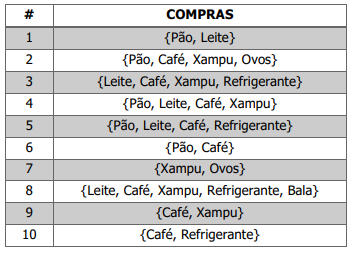

#### ASSOCIAÇÕES
| PRODUTOS              | SUPORTE    | CONFIANÇA  |
|-----------------------|------------|------------|
| Refrigerante -> Leite | **3/10 = 0,3** | **3/4 = 0,75** |
| Café -> Pão           | **4/10 = 0,4** | **4/8 = 0,5**  |
| Pão -> Leite          | **3/10 = 0,3** | **3/5 = 0,6**  |
| Café -> Refrigerante  | **4/10 = 0,4** | **4/8 = 0,5**  |
| Xampu -> Ovos         | **2/10 = 0,2** | **2/6 = 0,33** |
| Ovos -> Xampu         | **2/10 = 0,2** | **2/2 = 1**    |


**Na sua avaliação, observando apenas as indicações de suporte e confiança, qual o padrão de associação é mais forte nas transações de compras?**

Ovos -> Xampu. Sempre que alguém comprou ovos, xampu também foi comprado.



### Exercício 2 – Associação de itens de compras

<img src="exercicio2-inicio.PNG" align="left"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import display as print_dataframe
%matplotlib inline

In [2]:
dfCompras = pd.read_csv('COMPRAS.csv')
dfCompras['Qtd'] = 1
print_dataframe(dfCompras.head())

dfPivot = dfCompras.pivot_table(values = 'Qtd', 
                         index = 'carrinho', 
                         columns = 'produto',
                        fill_value = 0)

print_dataframe(dfPivot.head())

,data,carrinho,produto,Qtd
0,2000-01-01,1,yogurt,1
1,2000-01-01,1,pork,1
2,2000-01-01,1,sandwich bags,1
3,2000-01-01,1,lunch meat,1
4,2000-01-01,1,all- purpose,1


produto,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
carrinho,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
2,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,1,1,1


### Modelagem


In [3]:
modelProd = apriori(dfPivot, min_support=0.03, use_colnames=True)
regras = association_rules(modelProd, metric='lift', min_threshold=1)

### Análise dos resultados:

In [4]:
regras = regras.sort_values(['support', 'confidence'], ascending=[False, False])
print_dataframe(regras.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,(poultry),(vegetables),0.421422,0.739245,0.331870,0.787500,1.065276,0.020336,1.227083
1233,(vegetables),(poultry),0.739245,0.421422,0.331870,0.448931,1.065276,0.020336,1.049919
679,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989
678,(vegetables),(eggs),0.739245,0.389816,0.326602,0.441805,1.133370,0.038433,1.093139
1362,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388


#### O Apriori possui uma métrica adicional chamada lift. Pesquise a respeito e descreva o que ela mede, qual o objetivo dessa métrica?
Ela mede a possibilidade de aparecer o produto Y, dada a presença do produto X. Mede a relação do quanto o produto X consegue influenciar nas vendas do produto Y.


#### Se você listar o dataframe de resultados completo (todas as variáveis) perceberá que além do suporte e confiança, o Apriori indica o lift e outras métricas. Pesquise as métricas abaixo e descreva o que cada uma delas significa:
1. antecedent support;  
É a medida que o item antecedent aparece em uma transação em relação a todas as transações.
2. consequent support;  
É a medida que o item consequent aparece em uma transação em relação a todas as transações.
3. leverage;  
É a medida que indica o quanto um item é dependente do outro.
4. conviction.  
É a medida que indica o quanto o item consequent é dependente do item antescedent.



#### Explore o dataframe com os resultados (regras). Ordene e reordene utilizando as diferentes métricas acima (especialmente o lift). Na sua avaliação, utilizando suporte, confiança e demais métricas, quais as 5 regras mais interessantes que estão presentes nos dados? Justifique. 

Através do support conseguimos determinar que os itens mais vendidos juntos são poultry e vegetables.

Usando confiança conseguimos perceber que sempre que alguém compra (lunch meat, pasta, spaghetti sauce, sugar) também compra vegetables, o que provavelmente significa que ele vai fazer uma macarronada.

Usando lift conseguimos perceber que a compra de (soda, cheeses, dishwashing liquid/detergent) aumenta em 2.74% a compra de (flour, waffles).

O leverage indica que os itens mais dependentes são (soda, vegetables) com ovos.

Com o conviction conseguimos estimar que sempre que alguém comprar (ketchup, coffee/tea, eggs, lunch meat) irá comprar também vegetables.


In [5]:
# support
print("support")
regras = regras.sort_values(['support'], ascending =[False])
print_dataframe(regras.head())
print("-------------------------------------------------------")
# confidence
print("confidence")
regras = regras.sort_values(['confidence'], ascending =[False])
print_dataframe(regras.head())
print("-------------------------------------------------------")
# lift
print("lift")
regras = regras.sort_values(['lift'], ascending =[False])
print_dataframe(regras.head())

print("-------------------------------------------------------")
# antecedent support
print("antecedent support")
regras = regras.sort_values(['antecedent support'], ascending =[False])
print_dataframe(regras.head())

print("-------------------------------------------------------")
# consequent support
print("consequent support")
regras = regras.sort_values(['consequent support'], ascending =[False])
print_dataframe(regras.head())

print("-------------------------------------------------------")
# leverage
print("leverage")
regras = regras.sort_values(['leverage'], ascending =[False])
print_dataframe(regras.head())

print("-------------------------------------------------------")
# conviction
print("conviction")
regras = regras.sort_values(['conviction'], ascending =[False])
print_dataframe(regras.head())

support


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,(poultry),(vegetables),0.421422,0.739245,0.331870,0.787500,1.065276,0.020336,1.227083
1233,(vegetables),(poultry),0.739245,0.421422,0.331870,0.448931,1.065276,0.020336,1.049919
679,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989
678,(vegetables),(eggs),0.739245,0.389816,0.326602,0.441805,1.133370,0.038433,1.093139
1362,(yogurt),(vegetables),0.384548,0.739245,0.319579,0.831050,1.124188,0.035304,1.543388


-------------------------------------------------------
confidence


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
711672,"(dinner rolls, bagels, juice, eggs)",(vegetables),0.034241,0.739245,0.034241,1.0,1.352732,0.008928,inf
782252,"(dishwashing liquid/detergent, individual meal...",(vegetables),0.030729,0.739245,0.030729,1.0,1.352732,0.008013,inf
744520,"(dishwashing liquid/detergent, beef, sugar, wa...",(vegetables),0.030729,0.739245,0.030729,1.0,1.352732,0.008013,inf
661665,"(aluminum foil, juice, eggs, butter)",(vegetables),0.030729,0.739245,0.030729,1.0,1.352732,0.008013,inf
892913,"(poultry, dishwashing liquid/detergent, yogurt...",(vegetables),0.030729,0.739245,0.030729,1.0,1.352732,0.008013,inf


-------------------------------------------------------
lift


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
809828,"(dishwashing liquid/detergent, soda, cheeses)","(flour, waffles)",0.077261,0.144864,0.030729,0.397727,2.745523,0.019536,1.419849
809845,"(flour, waffles)","(dishwashing liquid/detergent, soda, cheeses)",0.144864,0.077261,0.030729,0.212121,2.745523,0.019536,1.171169
908139,"(ice cream, paper towels)","(pasta, eggs, lunch meat)",0.170325,0.065847,0.030729,0.180412,2.739863,0.019513,1.139784
908130,"(pasta, eggs, lunch meat)","(ice cream, paper towels)",0.065847,0.170325,0.030729,0.466667,2.739863,0.019513,1.555641
908136,"(ice cream, eggs)","(pasta, lunch meat, paper towels)",0.166813,0.068481,0.030729,0.184211,2.689946,0.019305,1.141862


-------------------------------------------------------
antecedent support


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
660581,(vegetables),"(beef, aluminum foil, yogurt, milk)",0.739245,0.038630,0.034241,0.046318,1.199012,0.005683,1.008061
99283,(vegetables),"(all- purpose, shampoo, yogurt)",0.739245,0.068481,0.055312,0.074822,1.092591,0.004687,1.006854
793558,(vegetables),"(yogurt, juice, cereals, laundry detergent)",0.739245,0.036874,0.032485,0.043943,1.191692,0.005225,1.007393
658753,(vegetables),"(beef, aluminum foil, eggs, fruits)",0.739245,0.036874,0.032485,0.043943,1.191692,0.005225,1.007393
872276,(vegetables),"(dinner rolls, sugar, milk, laundry detergent)",0.739245,0.036874,0.032485,0.043943,1.191692,0.005225,1.007393


-------------------------------------------------------
consequent support


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
823923,"(lunch meat, ketchup, cheeses, waffles)",(vegetables),0.030729,0.739245,0.030729,1.000000,1.352732,0.008013,inf
88689,"(poultry, all- purpose, juice)",(vegetables),0.079017,0.739245,0.064969,0.822222,1.112246,0.006557,1.466747
147273,"(aluminum foil, sandwich bags, individual meals)",(vegetables),0.059701,0.739245,0.053556,0.897059,1.213480,0.009422,2.533049
197281,"(juice, bagels, hand soap)",(vegetables),0.059701,0.739245,0.053556,0.897059,1.213480,0.009422,2.533049
98184,"(poultry, all- purpose, soda)",(vegetables),0.079017,0.739245,0.064969,0.822222,1.112246,0.006557,1.466747


-------------------------------------------------------
leverage


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33029,(eggs),"(soda, vegetables)",0.389816,0.305531,0.158033,0.405405,1.326887,0.038933,1.167970
33024,"(soda, vegetables)",(eggs),0.305531,0.389816,0.158033,0.517241,1.326887,0.038933,1.263953
679,(eggs),(vegetables),0.389816,0.739245,0.326602,0.837838,1.133370,0.038433,1.607989
678,(vegetables),(eggs),0.739245,0.389816,0.326602,0.441805,1.133370,0.038433,1.093139
26905,(eggs),"(dinner rolls, vegetables)",0.389816,0.308165,0.156277,0.400901,1.300929,0.036150,1.154792


-------------------------------------------------------
conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
795903,"(spaghetti sauce, cereals, pasta, laundry dete...",(vegetables),0.037752,0.739245,0.037752,1.0,1.352732,0.009844,inf
716502,"(poultry, dishwashing liquid/detergent, bagels...",(vegetables),0.038630,0.739245,0.038630,1.0,1.352732,0.010073,inf
823893,"(lunch meat, ketchup, soap, cheeses)",(vegetables),0.034241,0.739245,0.034241,1.0,1.352732,0.008928,inf
712122,"(yogurt, dinner rolls, bagels, eggs)",(vegetables),0.034241,0.739245,0.034241,1.0,1.352732,0.008928,inf
711672,"(dinner rolls, bagels, juice, eggs)",(vegetables),0.034241,0.739245,0.034241,1.0,1.352732,0.008928,inf
